Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 6</span>


In this exercise we study the 1D Ising model via two sampling methods: 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$

In particular, the following quantities are measured:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$. The results obtained with both sampling methods, Metropolis and Gibbs, are compared with the exact curves in the pictures below.

For all the measured quantities both the Metropolis and the Gibbs algorithms shows results that highly compatible with the theoretical curves.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plt_data(plt, filename, _label, col):
	T, y, err = np.loadtxt(filename, unpack=True)
	plt.errorbar(T, y, yerr=err,label=_label, color=col)
	return T

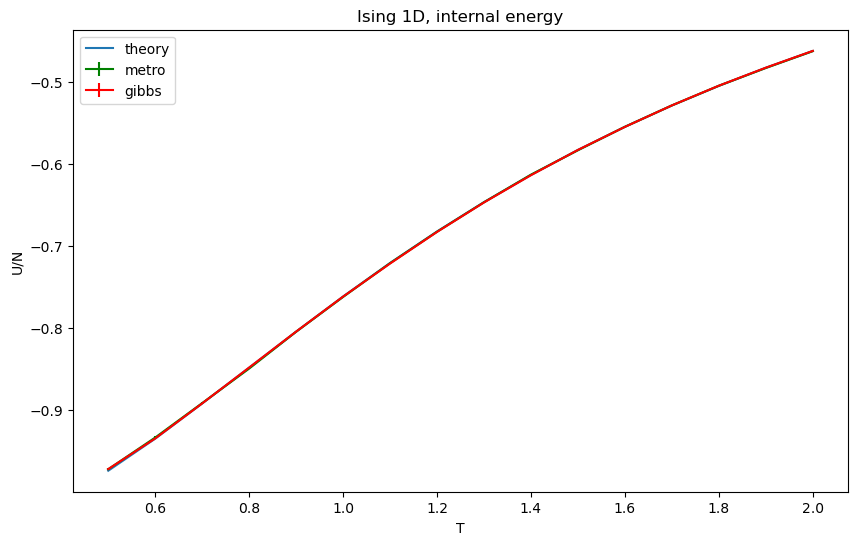

In [12]:
plt.figure(figsize=(10, 6))
plt_data(plt, "./OUTPUT/es_6/metro/total_energy_vs_temp.dat","metro", 'g')
T = plt_data(plt, "./OUTPUT/es_6/gibbs/total_energy_vs_temp.dat", "gibbs",'r')

beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label="theory")
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()

plt.show()

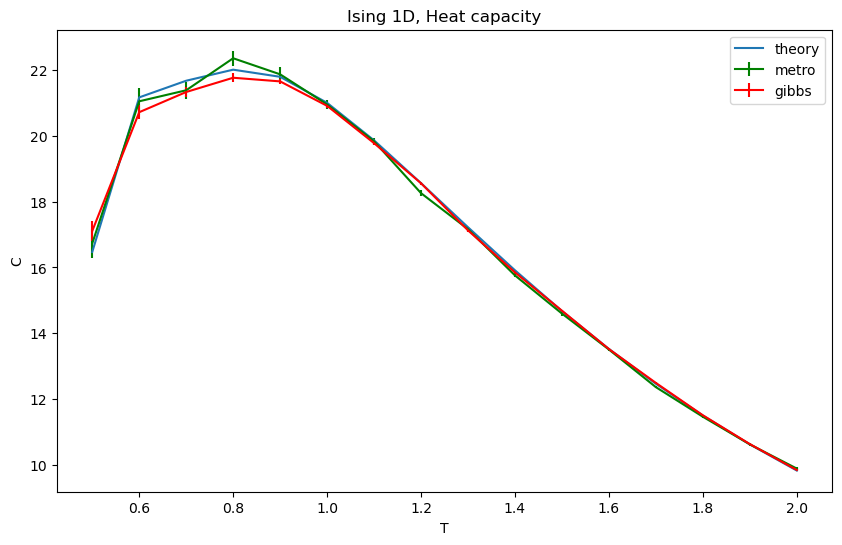

In [13]:
plt.figure(figsize=(10, 6))
plt_data(plt, "./OUTPUT/es_6/metro/specific_heat_vs_temp.dat", "metro",'g')
plt_data(plt, "./OUTPUT/es_6/gibbs/specific_heat_vs_temp.dat", "gibbs",'r')

heat=Ns*((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label="theory")
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()


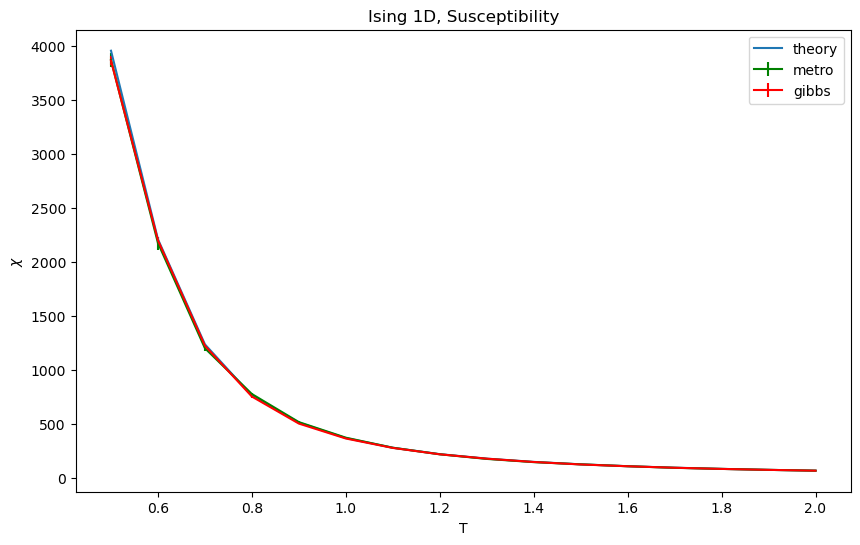

In [14]:
plt.figure(figsize=(10, 6))
plt_data(plt, "./OUTPUT/es_6/metro/susceptibility_vs_temp.dat", "metro",'g')
plt_data(plt, "./OUTPUT/es_6/gibbs/susceptibility_vs_temp.dat", "gibbs", 'r')

X = Ns*beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label="theory")
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()


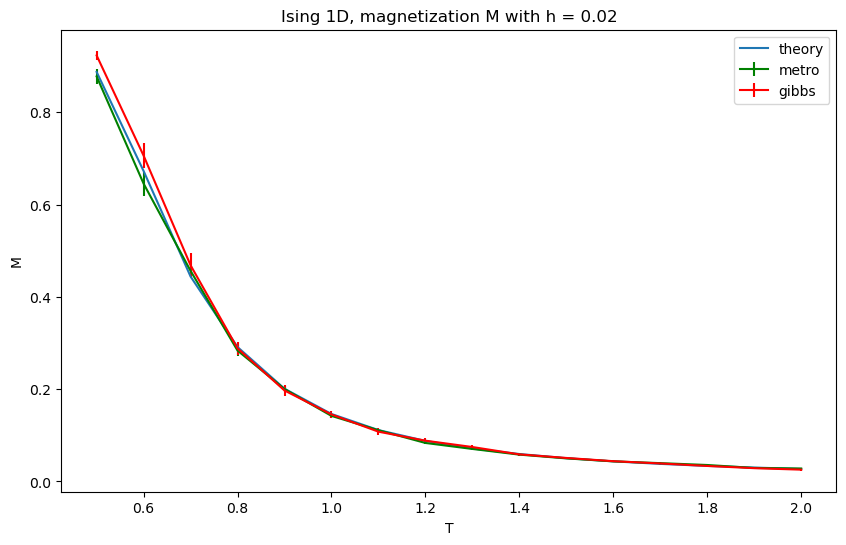

In [15]:
plt.figure(figsize=(10, 6))
plt_data(plt, "./OUTPUT/es_6/metro/magnetization_vs_temp.dat", "metro", 'g')
plt_data(plt, "./OUTPUT/es_6/gibbs/magnetization_vs_temp.dat", "gibbs",'r')
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label="theory")
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()
plt.show()
